In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import re
import pylab
import matplotlib.patches as patches

In [ ]:
df = pd.read_excel('mosclean.xlsx')
df_s = df[["price","totsp","livesp","kitsp","dist","metrdist","walk","brick","floor"]] 

# df_s2 = df_s.loc[df['op_type'] == 'For sale']
df_s
 
# df['brick'] = df['brick'] == 1
# df['walk'] = df['walk'] == 1
# df['floor'] = df['floor'] == 1

  
    

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor
0,81.0,58.0,40.0,6.0,12.5,7.0,by_step,brick,not_first_not_last
1,128.0,70.0,42.0,6.0,14.5,3.0,by_step,brick,not_first_not_last
2,95.0,61.0,37.0,6.0,13.5,7.0,by_step,other,not_first_not_last
3,137.0,76.0,50.0,9.0,11.0,7.0,by_step,brick,not_first_not_last
4,98.0,59.0,39.0,6.0,7.5,10.0,transport,other,not_first_not_last
...,...,...,...,...,...,...,...,...,...
1883,95.0,60.0,43.0,6.0,9.0,5.0,transport,other,not_first_not_last
1884,95.0,60.0,46.0,5.0,10.5,5.0,by_step,other,not_first_not_last
1885,129.0,76.0,48.0,10.0,12.5,5.0,transport,other,not_first_not_last
1886,103.0,64.0,45.0,7.0,15.5,5.0,by_step,other,not_first_not_last


In [ ]:
df_s2 = df_s.dropna()
df_s2


,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor
0,81.0,58.0,40.0,6.0,12.5,7.0,by_step,brick,not_first_not_last
1,128.0,70.0,42.0,6.0,14.5,3.0,by_step,brick,not_first_not_last
2,95.0,61.0,37.0,6.0,13.5,7.0,by_step,other,not_first_not_last
3,137.0,76.0,50.0,9.0,11.0,7.0,by_step,brick,not_first_not_last
4,98.0,59.0,39.0,6.0,7.5,10.0,transport,other,not_first_not_last
...,...,...,...,...,...,...,...,...,...
1882,110.0,77.0,45.0,10.0,12.0,5.0,transport,other,not_first_not_last
1883,95.0,60.0,43.0,6.0,9.0,5.0,transport,other,not_first_not_last
1884,95.0,60.0,46.0,5.0,10.5,5.0,by_step,other,not_first_not_last
1885,129.0,76.0,48.0,10.0,12.5,5.0,transport,other,not_first_not_last


In [ ]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1887 non-null   float64
 1   totsp     1887 non-null   float64
 2   livesp    1887 non-null   float64
 3   kitsp     1887 non-null   float64
 4   dist      1887 non-null   float64
 5   metrdist  1887 non-null   float64
 6   walk      1887 non-null   object 
 7   brick     1887 non-null   object 
 8   floor     1887 non-null   object 
dtypes: float64(6), object(3)
memory usage: 132.9+ KB


In [ ]:
df_s.to_excel('project.xlsx')

In [ ]:
df_s2['walk'] = np.where((df_s2.walk == 0), 'transport', df_s2.walk)
df_s2['walk'] = np.where((df_s2.walk == '1'), 'by_step', df_s2.walk)
df_s2['brick'] = np.where((df_s2.brick == 0), 'other', df_s2.brick)
df_s2['brick'] = np.where((df_s2.brick == '1'), 'brick', df_s2.brick)
df_s2['floor'] = np.where((df_s2.floor == 0), 'first_and_last' , df_s2.floor)
df_s2['floor'] = np.where((df_s2.floor == '1'), 'not_first_not_last', df_s2.floor)
df_s2



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor
0,81.0,58.0,40.0,6.0,12.5,7.0,by_step,brick,not_first_not_last
1,128.0,70.0,42.0,6.0,14.5,3.0,by_step,brick,not_first_not_last
2,95.0,61.0,37.0,6.0,13.5,7.0,by_step,other,not_first_not_last
3,137.0,76.0,50.0,9.0,11.0,7.0,by_step,brick,not_first_not_last
4,98.0,59.0,39.0,6.0,7.5,10.0,transport,other,not_first_not_last
...,...,...,...,...,...,...,...,...,...
1882,110.0,77.0,45.0,10.0,12.0,5.0,transport,other,not_first_not_last
1883,95.0,60.0,43.0,6.0,9.0,5.0,transport,other,not_first_not_last
1884,95.0,60.0,46.0,5.0,10.5,5.0,by_step,other,not_first_not_last
1885,129.0,76.0,48.0,10.0,12.5,5.0,transport,other,not_first_not_last


In [ ]:
df_s2.to_excel('project3.xlsx')

(array([31.33015368,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  8.66984632]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
        0.9  , 0.925, 0.95 , 0.975, 1.   ]),
 <a list of 40 Patch objects>)

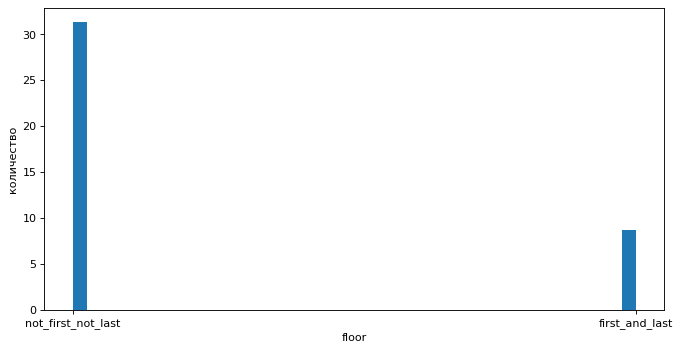

In [ ]:
fig, ax = plt.subplots(figsize=(10,5), facecolor='white', dpi= 80)
plt.xlabel('floor')
plt.ylabel('количество')
plt.hist(x=df_s2['floor'], bins=40, density=True)

In [ ]:
df_s1 = df_s2.describe()
df_s1
# include = ['object']
# desc_q = df_s.describe(include = include)
# desc_q.round(3)

,price,totsp,livesp,kitsp,dist,metrdist
count,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000
mean,127.496569,73.084314,46.337255,8.898529,11.015686,8.117157
std,51.878220,15.123450,7.894348,2.787073,3.375539,3.815574
min,50.000000,44.000000,28.000000,5.000000,3.000000,1.000000
25%,95.000000,62.000000,42.000000,7.000000,9.000000,5.000000
50%,115.000000,73.500000,45.000000,9.000000,12.000000,7.000000
75%,142.000000,79.000000,50.000000,10.000000,13.500000,10.000000
max,730.000000,192.000000,102.000000,25.000000,17.000000,20.000000


In [ ]:
df_s1.to_excel('describe2.xlsx')

In [ ]:
a = df_s2['floor'].value_counts()
a

not_first_not_last    1478
first_and_last         409
Name: floor, dtype: int64

In [ ]:
a.to_excel('fuelType.xlsx')

In [ ]:
!pip install scipy

In [ ]:
groups = {}
for grp in df_s2['fuelType'].unique():
    groups[grp] = df['price'][df['fuelType']==grp].values
print(groups)

{'Petrol': array([22440., 24995., 22450., ..., 39995., 26490., 27995.]), 'Diesel': array([27950., 26132., 27990., ..., 15950., 18295., 26495.])}


In [ ]:
import scipy
from scipy.stats import mstats


In [ ]:
args = groups.values()
H, pval = scipy.stats.kruskal(*args)
print('H-statistic=%.3f, P-value=%.3f' % (H, pval))
# print("H-statistic:", H)
# print("P-Value:", pval)
if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

H-statistic=0.576, P-value=0.448
Accept NULL hypothesis - No significant difference between groups.


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


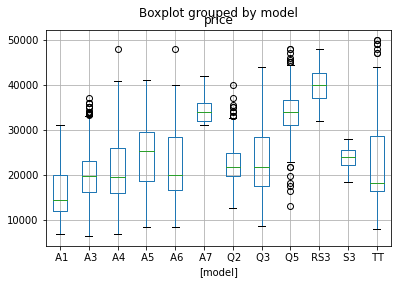

In [ ]:
boxplot = df_s2.boxplot(column=['price' ], by = ['model'])

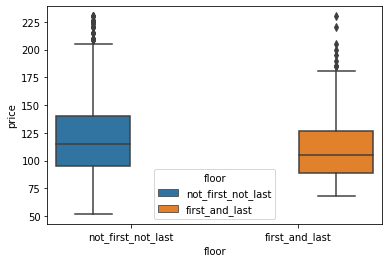

In [ ]:
import seaborn as sns
import pandas as ppd


sns.boxplot(data = df_s2 , x = 'floor' , y = 'price' , hue = 'floor', width=0.9)


Text(0.5, 20.80000000000002, 'metrdist')

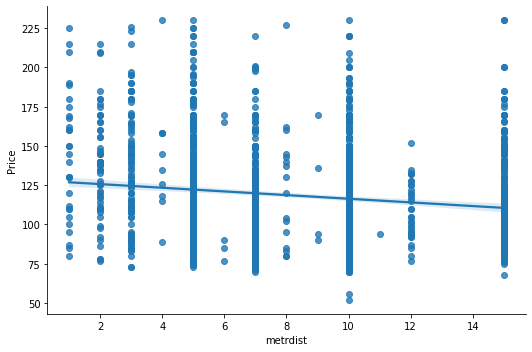

In [ ]:
sns.lmplot(x = 'metrdist', y = 'price', data = df_s2, aspect = 1.5)
plt.ylabel('Price')
plt.xlabel('metrdist')

In [ ]:
from scipy.stats import spearmanr
Col_1 = list(df_s2['price'])
Col_2 = list(df_s2['metrdist'])
coef, p = spearmanr(Col_1, Col_2)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.132
Samples are correlated (reject H0) p=0.000


In [ ]:
from scipy.stats import kendalltau
Col_1 = list(df_s2['price'])
Col_2 = list(df_s2['totsp'])
coef, p = kendalltau(Col_1, Col_2)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Kendall correlation coefficient: 0.555
Samples are correlated (reject H0) p=0.000


In [ ]:
from scipy.stats import pearsonr
Col_1 = list(df_s2['price'])
Col_2 = list(df_s2['metrdist'])
corr, _ = pearsonr(Col_1, Col_2)
print ( 'Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.139


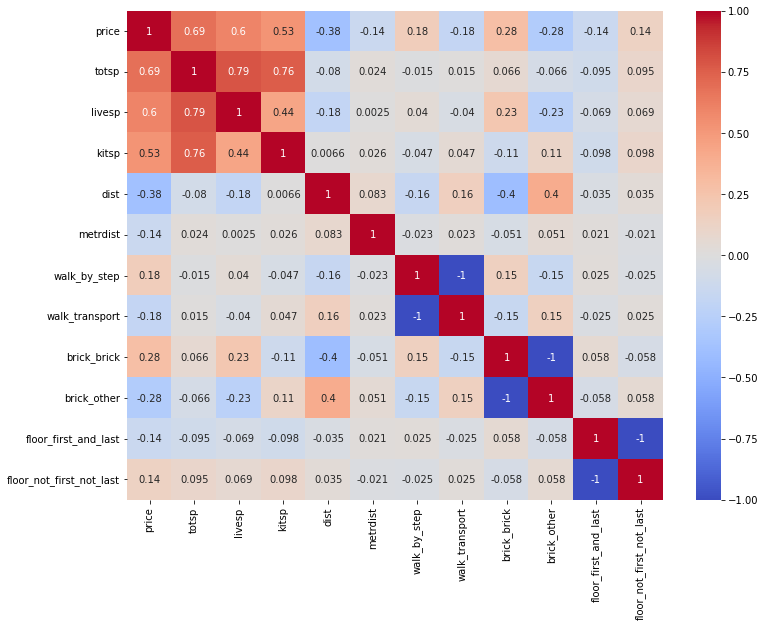

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 9))
sns.heatmap(prestige_df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

In [ ]:
df_s2.to_excel('corr.xlsx')

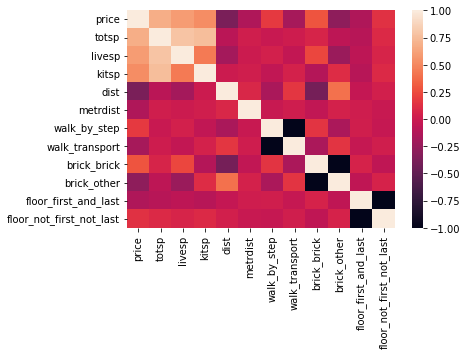

In [ ]:
import seaborn as sns
sns.heatmap(prestige_df.corr())

In [ ]:
import statsmodels.api as sm
Col_1 = list(df_s2['price'])
Col_2 = list(df_s2['totsp',	'livesp',	'kitsp',	'dist',	'metrdist',	C['walk'],	'brick',	'floor'])
results = sm.OLS(Col_1, Col_2).fit()
results

KeyError: ignored

In [ ]:

prestige_dummies = pd.get_dummies(df_s2.select_dtypes(include=[object]))
prestige_df = pd.concat([df_s2, prestige_dummies], axis=1)
prestige_df

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,walk_by_step,walk_transport,brick_brick,brick_other,floor_first_and_last,floor_not_first_not_last
0,81.0,58.0,40.0,6.0,12.5,7.0,by_step,brick,not_first_not_last,1,0,1,0,0,1
1,128.0,70.0,42.0,6.0,14.5,3.0,by_step,brick,not_first_not_last,1,0,1,0,0,1
2,95.0,61.0,37.0,6.0,13.5,7.0,by_step,other,not_first_not_last,1,0,0,1,0,1
3,137.0,76.0,50.0,9.0,11.0,7.0,by_step,brick,not_first_not_last,1,0,1,0,0,1
4,98.0,59.0,39.0,6.0,7.5,10.0,transport,other,not_first_not_last,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,110.0,77.0,45.0,10.0,12.0,5.0,transport,other,not_first_not_last,0,1,0,1,0,1
1883,95.0,60.0,43.0,6.0,9.0,5.0,transport,other,not_first_not_last,0,1,0,1,0,1
1884,95.0,60.0,46.0,5.0,10.5,5.0,by_step,other,not_first_not_last,1,0,0,1,0,1
1885,129.0,76.0,48.0,10.0,12.5,5.0,transport,other,not_first_not_last,0,1,0,1,0,1


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
results = smf.ols('price ~ kitsp + dist + metrdist + walk_by_step  +	brick_brick	+ brick_other  +	floor_not_first_not_last', data=prestige_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     327.1
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          1.74e-287
Time:                        20:52:33   Log-Likelihood:                -8489.6
No. Observations:                1887   AIC:                         1.699e+04
Df Residuals:                    1880   BIC:                         1.703e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   50.4270      2.132     23.653      0.000      46.246      54.608
kitsp                        8.2499      0.243     33.892      0.000       7.773       8.727
dist                        -2.5152      0.165    -15.236      0.000      -2.839      -2.191
metrdist                    -0.9625      0.136     -7.085      0.000      -1.229      -0.696
walk_by_step                 8.4742      1.096      7.735      0.000       6.326      10.623
brick_brick                 32.6139      1.105     29.521      0.000      30.447      34.781
brick_other                 17.8132      1.333     13.367      0.000      15.200      20.427
floor_not_first_not_last     7.8727      1.226      6.422      0.000       5.468      10.277
==============================================================================
Omnibus:                      189.535   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              330.494
Skew:                           0.686   Prob(JB):                     1.71e-72
Kurtosis:                       4.523   Cond. No.                     5.93e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.48e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
results.mse_model

155437.38964840228

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
  
# the independent variables set
X = prestige_df[[	'kitsp', 'dist',	'metrdist', 'walk_by_step' , 'brick_brick', 'floor_not_first_not_last']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data
# vif_data.to_excel('VIF.xlsx')

,feature,VIF
0,kitsp,10.963754
1,dist,9.127570
2,metrdist,5.375791
3,walk_by_step,2.952587
4,brick_brick,1.500257
5,floor_not_first_not_last,4.418059


In [ ]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
from patsy import dmatrices
expr = 'price ~	kitsp + dist + metrdist + walk_by_step  + brick_brick  +	floor_not_first_not_last'
y, X = dmatrices(expr, prestige_df, return_type='dataframe')
keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
results = het_white(results.resid, X)
lzip(keys, results)

[('Lagrange Multiplier statistic:', 235.56348150752711),
 ("LM test's p-value:", 1.1773685702164417e-36),
 ('F-statistic:', 11.066607709294324),
 ("F-test's p-value:", 1.8647228874165903e-39)]

In [ ]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(results.resid)

2.003255716095538

In [ ]:
#Гипотеза 1. Квартиры ближе к метро стоят дороже, потому что не нужно пользоваться транспортом, чтобы добраться до станции.
resultsH1 = smf.ols('price ~ metrdist + walk_by_step + walk_transport', data=prestige_df).fit()
resultsH1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     49.32
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           1.32e-21
Time:                        20:29:45   Log-Likelihood:                -9115.9
No. Observations:                1887   AIC:                         1.824e+04
Df Residuals:                    1884   BIC:                         1.825e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         83.7875      1.140     73.486      0.000      81.551      86.024
metrdist          -1.1323      0.188     -6.011      0.000      -1.502      -0.763
walk_by_step      47.7115      0.857     55.689      0.000      46.031      49.392
walk_transport    36.0760      1.019     35.410      0.000      34.078      38.074
==============================================================================
Omnibus:                      193.877   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.118
Skew:                           0.851   Prob(JB):                     2.43e-56
Kurtosis:                       3.600   Cond. No.                     2.56e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.34e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
resultsH1.mse_model

45426.04663476534

In [ ]:
#Гипотеза 4. Кирпичные дома дороже, потому что находятся ближе к центру.
resultsH4 = smf.ols('price ~ dist + brick_brick	+ brick_other', data=prestige_df).fit()
resultsH4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     187.5
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           5.67e-75
Time:                        20:29:54   Log-Likelihood:                -8992.8
No. Observations:                1887   AIC:                         1.799e+04
Df Residuals:                    1884   BIC:                         1.801e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     102.3722      1.575     65.012      0.000      99.284     105.461
dist           -2.9591      0.213    -13.879      0.000      -3.377      -2.541
brick_brick    56.4641      0.941     60.020      0.000      54.619      58.309
brick_other    45.9081      1.248     36.793      0.000      43.461      48.355
==============================================================================
Omnibus:                      145.243   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.781
Skew:                           0.666   Prob(JB):                     6.16e-42
Kurtosis:                       3.800   Cond. No.                     3.19e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.54e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
resultsH4.mse_model

151534.77195213584

In [ ]:
from statsmodels.formula.api import ols


infl = results.get_influence()
sm_fr = infl.summary_frame()
sm_fr

,dfb_Intercept,dfb_C(walk)[T.transport],dfb_C(brick)[T.other],dfb_C(floor)[T.not_first_not_last],dfb_totsp,dfb_dist,dfb_metrdist,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.025809,0.015046,0.049084,-0.019357,0.032858,-0.029206,0.006511,0.000696,-1.160622,0.003605,-0.069810,-1.160729,-0.069817
1,0.000045,-0.002645,-0.008036,0.002271,-0.000145,0.007584,-0.005634,0.000021,0.173282,0.004852,0.012099,0.173238,0.012096
2,-0.001861,0.003142,-0.001658,-0.002135,0.003097,-0.002021,0.001228,0.000007,-0.163829,0.001825,-0.007005,-0.163787,-0.007003
3,0.000834,0.002080,0.005870,-0.002110,-0.001524,-0.002638,0.000991,0.000009,-0.162096,0.002410,-0.007967,-0.162054,-0.007965
4,0.001795,0.002174,0.001322,0.000856,-0.001699,-0.002425,0.000849,0.000002,0.059966,0.004280,0.003932,0.059950,0.003930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,0.007186,-0.025046,-0.009145,-0.007062,-0.010678,0.001266,0.016487,0.000225,-0.796129,0.002482,-0.039716,-0.796051,-0.039712
1883,-0.008624,-0.009953,-0.005237,-0.003672,0.006911,0.007578,0.005079,0.000041,-0.283397,0.003523,-0.016850,-0.283328,-0.016846
1884,-0.013768,0.009026,-0.010358,-0.007302,0.012114,0.005315,0.010045,0.000093,-0.547885,0.002174,-0.025573,-0.547783,-0.025569
1885,-0.003260,0.011535,0.003692,0.003343,0.004275,0.000765,-0.007752,0.000048,0.370969,0.002431,0.018313,0.370884,0.018309


In [ ]:
# print('predicted response:', results.fittedvalues, sep='\n')
predict = results.fittedvalues
predict.to_excel('predicted_results5.xlsx')

In [ ]:
df_pred = pd.read_excel('predicted_results6.xlsx')
df_pred2 = df_pred[["price", "Predicted_price"]] 

# df_s2 = df_s.loc[df['op_type'] == 'For sale']
df_pred2

,price,Predicted_price
0,81,110.710043
1,128,109.529537
2,95,93.394099
3,137,139.232638
4,98,97.123653
...,...,...
1882,110,123.617334
1883,95,98.163225
1884,95,94.614732
1885,129,122.359732


In [ ]:
df_pred2['error_rate'] = (df_pred2['price'] - df_pred2['Predicted_price'])**2
df_pred2

,price,Predicted_price,error_rate
0,81,110.710043,882.686626
1,128,109.529537,341.158005
2,95,93.394099,2.578917
3,137,139.232638,4.984673
4,98,97.123653,0.767984
...,...,...,...
1882,110,123.617334,185.431776
1883,95,98.163225,10.005993
1884,95,94.614732,0.148432
1885,129,122.359732,44.093162


In [ ]:
err = ((df_pred2['error_rate'].sum())**(1/2)) / 1887
err

0.5009102877263146

In [ ]:
import statistics
avg  = statistics.mean(df_pred2['error_rate'])
avg

0.02110318966698675



Leverage vs. Studentized Residuals


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Studentized Residuals')

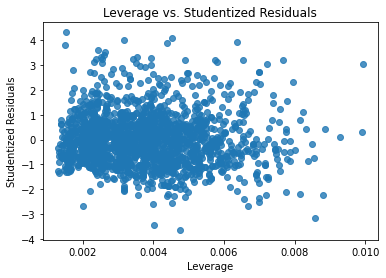

In [ ]:
from statsmodels.formula.api import ols

# m = ols('price ~ totsp + dist + metrdist + C(walk) +	C(brick) + C(floor)', data=df_s2).fit()
infl = results.get_influence()
sm_fr = infl.summary_frame()

student_resid = infl.resid_studentized_external
(cooks, p) = infl.cooks_distance
(dffits, p) = infl.dffits
leverage = infl.hat_matrix_diag
print ('\n')
print ('Leverage vs. Studentized Residuals')
sns.regplot(leverage, results.resid_pearson,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')

In [ ]:
df_lev = pd.DataFrame(leverage)
df_lev.to_excel('lever.xlsx')


In [ ]:
df_lev2 = pd.read_excel('lev2.xlsx')
df_lev3 = df_lev2[["price", "Leverage"]] 

# df_s2 = df_s.loc[df['op_type'] == 'For sale']
df_lev3

,price,Leverage
0,81,0.003605
1,128,0.004852
2,95,0.001825
3,137,0.002410
4,98,0.004280
...,...,...
1882,110,0.002482
1883,95,0.003523
1884,95,0.002174
1885,129,0.002431


In [ ]:
sum(leverage)

6.999999999999997

In [ ]:
print(2*sum(leverage)/1887)

0.0074191838897721225


In [ ]:
Leverage =  df_lev3.Leverage
#Print the median house value of the outliers
df_out2 = df_lev3.price[abs(Leverage) > 0.007]
df_out2


9       115
18      170
49      140
57       89
66      220
       ... 
1808    148
1819    170
1830    122
1868     92
1874     95
Name: price, Length: 71, dtype: int64

In [ ]:
df_out2.to_excel('outlierslev.xlsx')

In [ ]:
df_pr = pd.read_excel('price.xlsx')
df_price = df_pr[["price"]] 

# df_s2 = df_s.loc[df['op_type'] == 'For sale']
df_price

,price
0,225
1,110
2,56
3,198
4,193
...,...
158,148
159,170
160,122
161,92


In [ ]:
df_price2 = df_price.price.unique()
df_price3 = pd.DataFrame(df_price2)
df_price3['price'] = df_price3[0]
df_price3.drop(0, 1)

,price
0,225
1,110
2,56
3,198
4,193
...,...
77,70
78,74
79,86
80,112


In [ ]:
df_new = df_price3.merge(prestige_df, on = 'price', how = 'left')
df_new2 = df_new.dropna()
df_new2

,0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,walk_by_step,walk_transport,brick_brick,brick_other,floor_first_and_last,floor_not_first_not_last
0,225,225,80.0,56.0,9.0,9.0,5.0,by_step,brick,not_first_not_last,1,0,1,0,0,1
1,225,225,80.0,53.0,9.0,7.0,5.0,by_step,brick,not_first_not_last,1,0,1,0,0,1
2,225,225,92.0,48.0,13.0,9.0,1.0,by_step,brick,not_first_not_last,1,0,1,0,0,1
3,110,110,75.0,50.0,10.0,13.5,10.0,transport,other,not_first_not_last,0,1,0,1,0,1
4,110,110,85.0,54.0,10.0,6.0,10.0,transport,brick,not_first_not_last,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,112,112,72.0,50.0,9.0,17.0,10.0,by_step,brick,first_and_last,1,0,1,0,1,0
1435,148,148,92.0,61.0,10.0,10.5,15.0,by_step,brick,not_first_not_last,1,0,1,0,0,1
1436,148,148,84.0,52.0,8.0,6.5,3.0,by_step,brick,not_first_not_last,1,0,1,0,0,1
1437,148,148,74.0,51.0,9.0,7.5,10.0,by_step,brick,not_first_not_last,1,0,1,0,0,1


In [ ]:
results3 = smf.ols('price ~ kitsp + dist + metrdist + walk_by_step  + brick_brick  +	floor_not_first_not_last', data=df_new2).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     236.0
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          1.05e-209
Time:                        12:59:30   Log-Likelihood:                -6536.9
No. Observations:                1439   AIC:                         1.309e+04
Df Residuals:                    1432   BIC:                         1.312e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   67.3351      4.021     16.745      0.000      59.447      75.223
kitsp                        8.6397      0.294     29.417      0.000       8.064       9.216
dist                        -2.4964      0.198    -12.578      0.000      -2.886      -2.107
metrdist                    -1.1287      0.161     -7.000      0.000      -1.445      -0.812
walk_by_step                 7.8565      1.320      5.950      0.000       5.266      10.447
brick_brick                 16.0822      1.436     11.201      0.000      13.266      18.899
floor_not_first_not_last     7.6068      1.450      5.247      0.000       4.763      10.450
==============================================================================
Omnibus:                      127.730   Durbin-Watson:                   1.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.469
Skew:                           0.640   Prob(JB):                     8.88e-46
Kurtosis:                       4.350   Cond. No.                         113.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_cook = pd.read_excel('cook4.xlsx')
df_cook2 = df_cook[["price", "student_resid"]] 

# df_s2 = df_s.loc[df['op_type'] == 'For sale']
df_cook2

,price,student_resid
0,81,-1.160729
1,128,0.173238
2,95,-0.163787
3,137,-0.162054
4,98,0.059950
...,...,...
1882,110,-0.796051
1883,95,-0.283328
1884,95,-0.547783
1885,129,0.370884


In [ ]:
studentized_resids =  df_cook2.student_resid
#Print the median house value of the outliers
df_out = df_cook2.price[abs(studentized_resids) > 2]
df_out

6       225
17      110
23       56
56      198
58      193
       ... 
1804    160
1813    215
1816    185
1868     92
1880    180
Name: price, Length: 92, dtype: int64

In [ ]:
df_out.to_excel('outliers.xlsx')

In [ ]:
sm_fr.to_excel('cook_dist.xlsx')

In [ ]:
from scipy.stats import mstats

Col_1 = list(df_s2['price'])
Col_2 = list(df_s2['floor'])


print("Kruskal Wallis H-test test:")

H, pval = mstats.kruskalwallis(Col_1, Col_2)

print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

Kruskal Wallis H-test test:
H-statistic: 3014.843444265929
P-Value: 0.0
Reject NULL hypothesis - Significant differences exist between groups.


ValueError: ignored

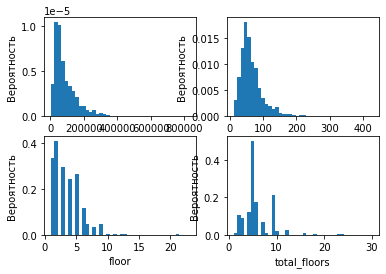

In [ ]:
pylab.subplot (2, 2, 1)
plt.xlabel('price')
plt.ylabel('Вероятность')
plt.hist(x=df_s2['price'], bins=40, density=True)


pylab.subplot (2, 2, 3)
plt.xlabel('floor')
plt.ylabel('Вероятность')
plt.hist(x=df_s2['floor'], bins=40, density=True)

pylab.subplot (2, 2, 2)
plt.xlabel('area')
plt.ylabel('Вероятность')
plt.hist(x=df_s2['area'], bins=40, density=True)

pylab.subplot (2, 2, 4)
plt.xlabel('total_floors')
plt.ylabel('Вероятность')
plt.hist(x=df_s2['total_floors'], bins=40, density=True)

pylab.subplot (2, 2, 5)
plt.xlabel('lat')
plt.ylabel('Вероятность')
plt.hist(x=df_s2['lat'], bins=40, density=True)

pylab.subplot (2, 2, 6)
plt.xlabel('lon')
plt.ylabel('Вероятность')
plt.hist(x=df_s2['lon'], bins=40, density=True)

In [ ]:
pd.crosstab(df_s.walk, df_s.brick, df_s.floor)

ValueError: ignored

# Новый раздел